<a href="https://colab.research.google.com/github/Gaya-2004/my-project/blob/main/concrete_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, f1_score, recall_score,roc_auc_score, precision_score, confusion_matrix, classification_report

from yellowbrick.classifier import ClassificationReport, ROCAUC

In [2]:
#IMPORTING DATA
cdata = pd.read_csv('/ConcreteStrengthData.csv')
cdata.head()

CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0             540.0               0.0              0.0           162.0   
1             540.0               0.0              0.0           162.0   
2             332.5             142.5              0.0           228.0   
3             332.5             142.5              0.0           228.0   
4             198.6             132.4              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        2.5                    1040.0   
1                        2.5                    1055.0   
2                        0.0                     932.0   
3                        0.0                     932.0   
4                        0.0                     978.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   676.0         28     79.99  
1                   676.0         28     61.89  
2                   594.0        270     40.27  
3                   594.0        365     41.05  
4                   825.5        360     44.30

In [3]:
# Data Info
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
# Data Type
cdata.dtypes

CementComponent              float64
BlastFurnaceSlag             float64
FlyAshComponent              float64
WaterComponent               float64
SuperplasticizerComponent    float64
CoarseAggregateComponent     float64
FineAggregateComponent       float64
AgeInDays                      int64
Strength                     float64
dtype: object

In [5]:
#Checking missing values
cdata.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [7]:
#Check for zeros
(cdata[:][:] == 0).sum()

CementComponent                0
BlastFurnaceSlag             471
FlyAshComponent              566
WaterComponent                 0
SuperplasticizerComponent    379
CoarseAggregateComponent       0
FineAggregateComponent         0
AgeInDays                      0
Strength                       0
dtype: int64

In [8]:
#Number of Unique data
cdata.nunique()

CementComponent              278
BlastFurnaceSlag             185
FlyAshComponent              156
WaterComponent               195
SuperplasticizerComponent    111
CoarseAggregateComponent     284
FineAggregateComponent       302
AgeInDays                     14
Strength                     845
dtype: int64

In [9]:
(cdata[:][:] < 0).sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [10]:
cdata.describe().T

count        mean         std     min      25%  \
CementComponent            1030.0  281.167864  104.506364  102.00  192.375   
BlastFurnaceSlag           1030.0   73.895825   86.279342    0.00    0.000   
FlyAshComponent            1030.0   54.188350   63.997004    0.00    0.000   
WaterComponent             1030.0  181.567282   21.354219  121.80  164.900   
SuperplasticizerComponent  1030.0    6.204660    5.973841    0.00    0.000   
CoarseAggregateComponent   1030.0  972.918932   77.753954  801.00  932.000   
FineAggregateComponent     1030.0  773.580485   80.175980  594.00  730.950   
AgeInDays                  1030.0   45.662136   63.169912    1.00    7.000   
Strength                   1030.0   35.817961   16.705742    2.33   23.710   

                               50%       75%     max  
CementComponent            272.900   350.000   540.0  
BlastFurnaceSlag            22.000   142.950   359.4  
FlyAshComponent              0.000   118.300   200.1  
WaterComponent             185.000   192.000   247.0  
SuperplasticizerComponent    6.400    10.200    32.2  
CoarseAggregateComponent   968.000  1029.400  1145.0  
FineAggregateComponent     779.500   824.000   992.6  
AgeInDays                   28.000    56.000   365.0  
Strength                    34.445    46.135    82.6

In [11]:
cdata.nunique()

CementComponent              278
BlastFurnaceSlag             185
FlyAshComponent              156
WaterComponent               195
SuperplasticizerComponent    111
CoarseAggregateComponent     284
FineAggregateComponent       302
AgeInDays                     14
Strength                     845
dtype: int64

In [13]:
# Duplicate Check
cdata.duplicated().sum()

np.int64(25)

<Axes: >

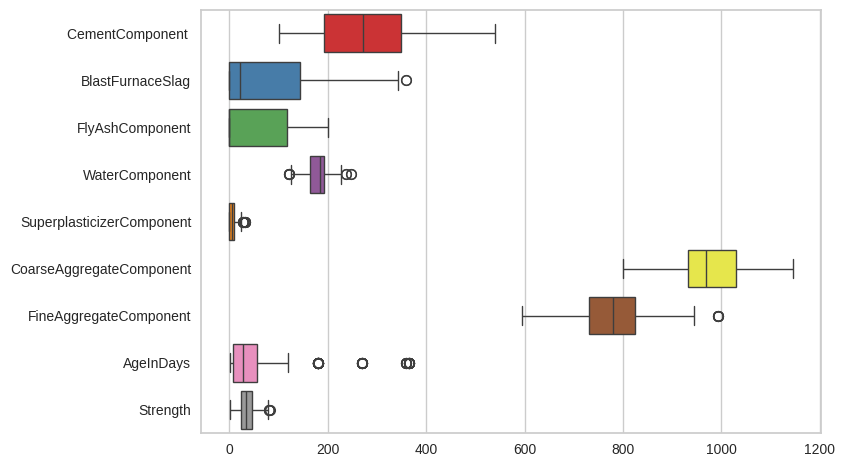

In [14]:
sns.boxplot(data=cdata, orient="h", palette="Set1")

CEMENTCOMPONENT  :


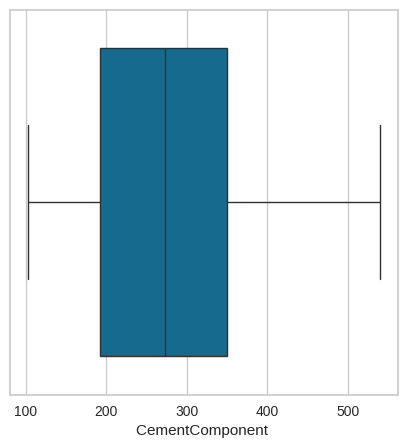

BLASTFURNACESLAG :


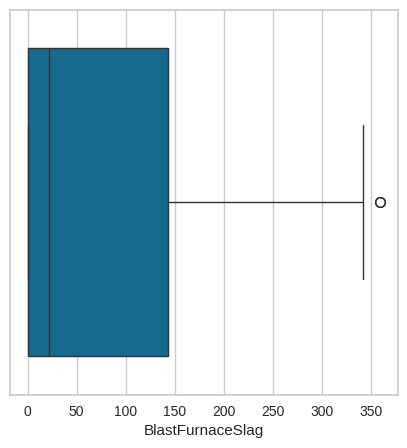

FLYASHCOMPONENT :


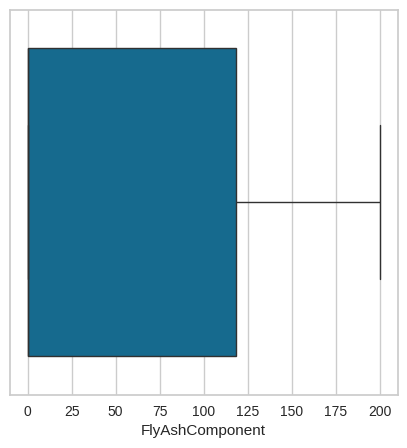

WATERCOMPONENT :


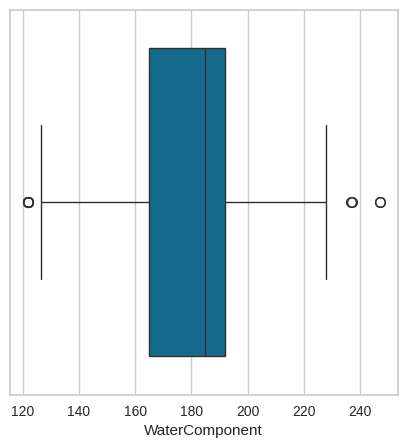

SUPERPLASTICIZERCOMPONENT :


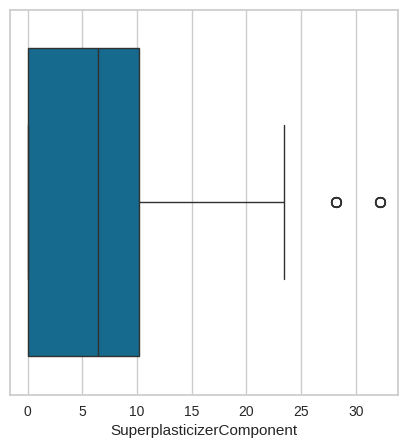

COARSEAGGREGATECOMPONENT :


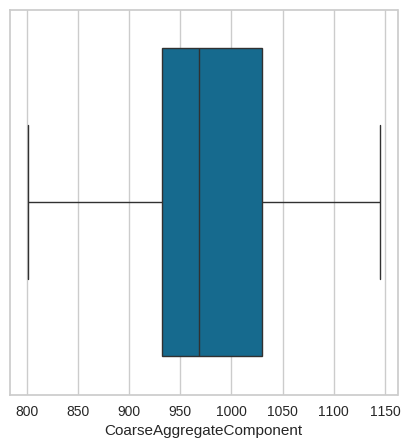

FINEAGGREGATECOMPONENT :


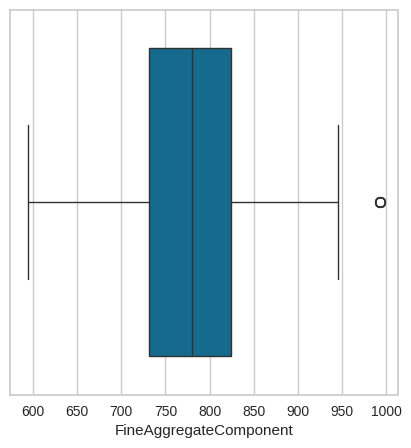

AGEINDAYS :


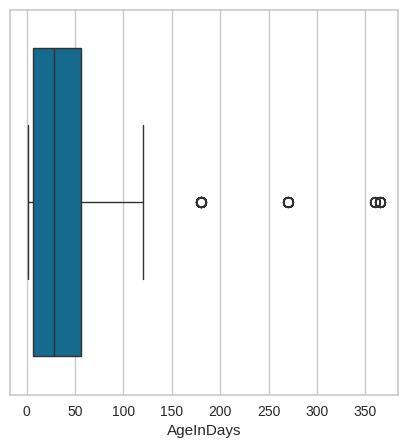

STRENGTH :


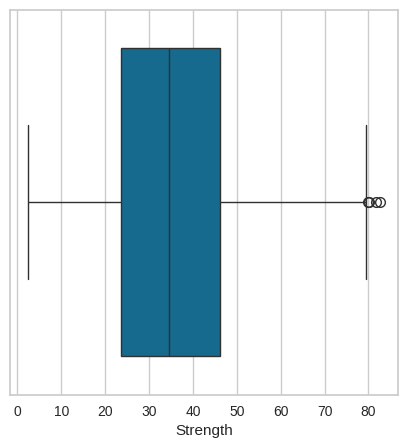

In [15]:
#Box plot to check outlier individual collumns
for i in cdata.columns:
    print(i.upper(),":")
    plt.figure(figsize=(5,5))
    sns.boxplot(x=cdata[i])
    plt.show()

In [16]:
# Defining Q1 Q3 and IQR to treat outliers
Q1 = cdata.quantile(0.25)
Q3 = cdata.quantile(0.75)
IQR = Q3-Q1
print("Count of Outlier on each column \n",IQR)
((cdata < (Q1 - 1.5 * IQR))|(cdata > (Q3 + 1.5 * IQR))).sum()

Count of Outlier on each column 
 CementComponent              157.625
BlastFurnaceSlag             142.950
FlyAshComponent              118.300
WaterComponent                27.100
SuperplasticizerComponent     10.200
CoarseAggregateComponent      97.400
FineAggregateComponent        93.050
AgeInDays                     49.000
Strength                      22.425
dtype: float64


CementComponent               0
BlastFurnaceSlag              2
FlyAshComponent               0
WaterComponent                9
SuperplasticizerComponent    10
CoarseAggregateComponent      0
FineAggregateComponent        5
AgeInDays                    59
Strength                      4
dtype: int64

In [17]:
#IQR and lower & upper limit for outliers
for i in cdata.columns[:-1]:
    Q1 = cdata[i].quantile(0.25)
    Q3 = cdata[i].quantile(0.75)
    IQR = Q3-Q1
    L = Q1-1.5*IQR
    U = Q3+1.5*IQR
    print('Replacing outliers of ',i.upper(),' less than ',L.round(2),' more than ',U.round(2))

Replacing outliers of  CEMENTCOMPONENT   less than  -44.06  more than  586.44
Replacing outliers of  BLASTFURNACESLAG  less than  -214.42  more than  357.38
Replacing outliers of  FLYASHCOMPONENT  less than  -177.45  more than  295.75
Replacing outliers of  WATERCOMPONENT  less than  124.25  more than  232.65
Replacing outliers of  SUPERPLASTICIZERCOMPONENT  less than  -15.3  more than  25.5
Replacing outliers of  COARSEAGGREGATECOMPONENT  less than  785.9  more than  1175.5
Replacing outliers of  FINEAGGREGATECOMPONENT  less than  591.38  more than  963.58
Replacing outliers of  AGEINDAYS  less than  -66.5  more than  129.5


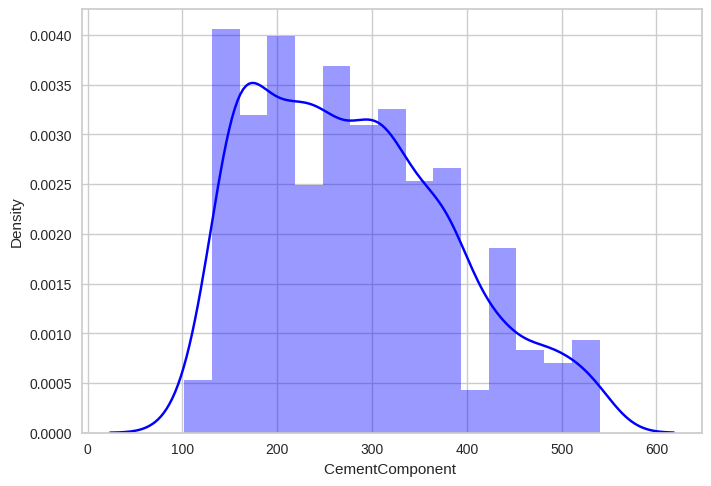

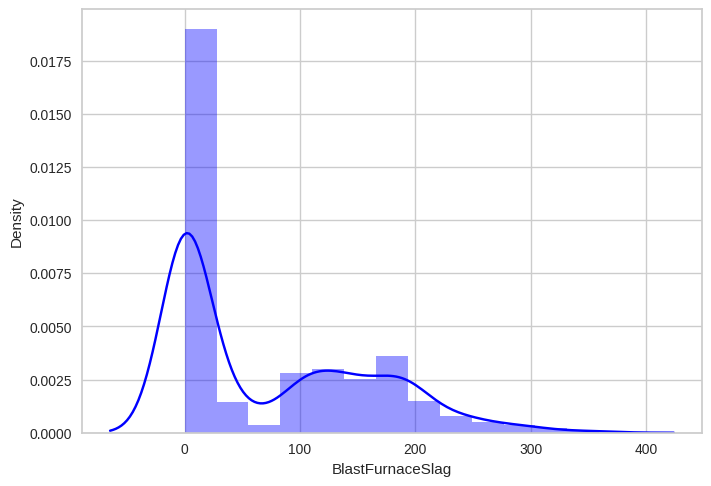

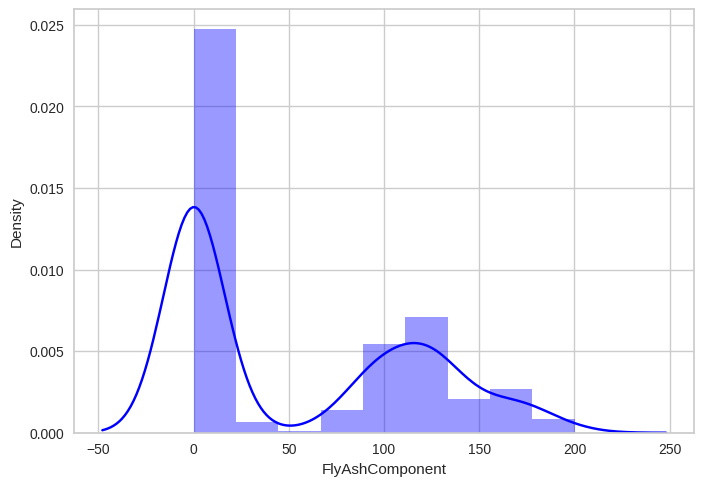

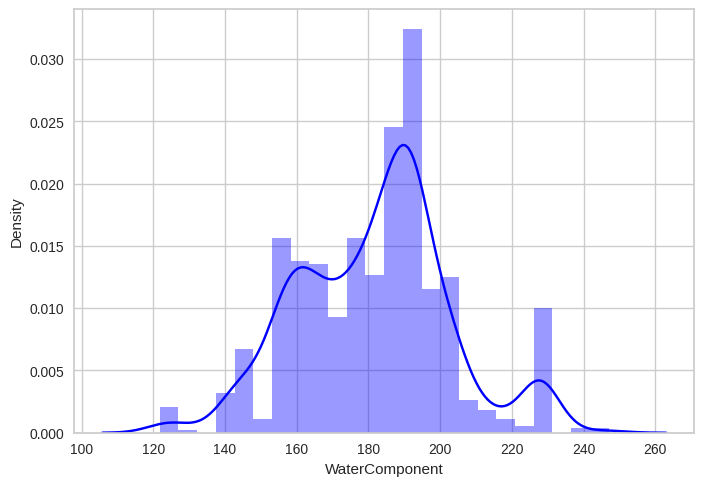

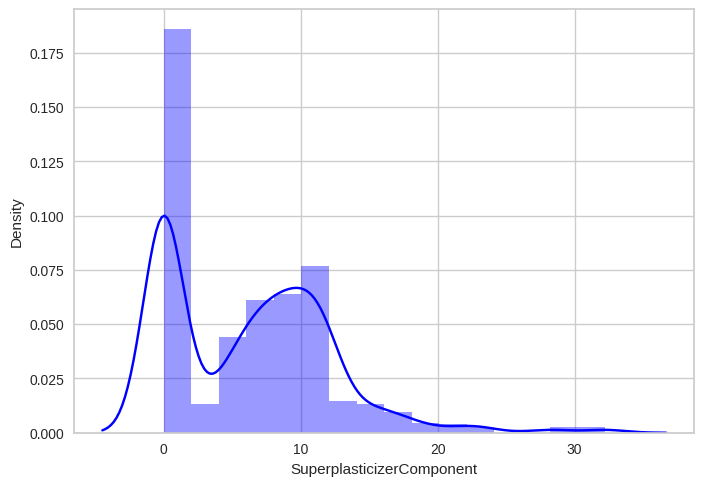

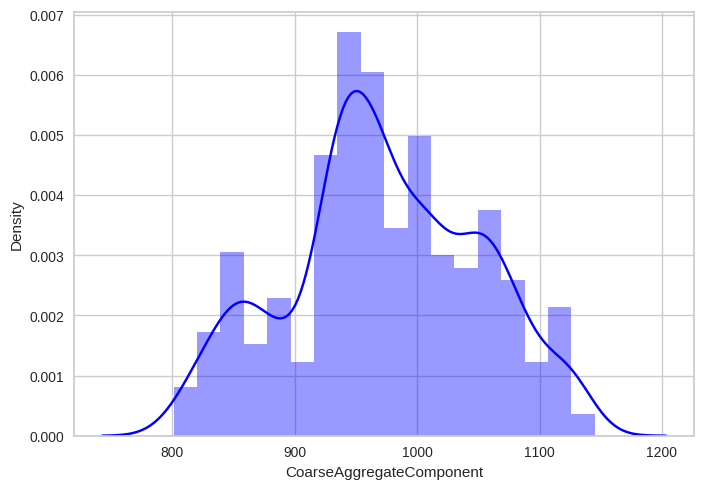

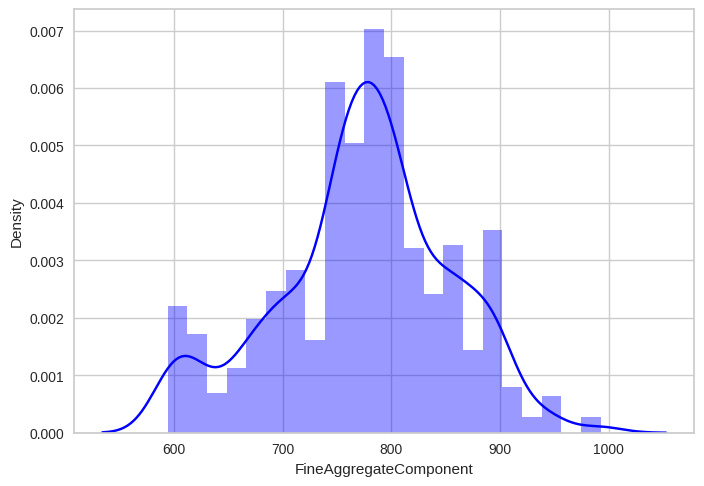

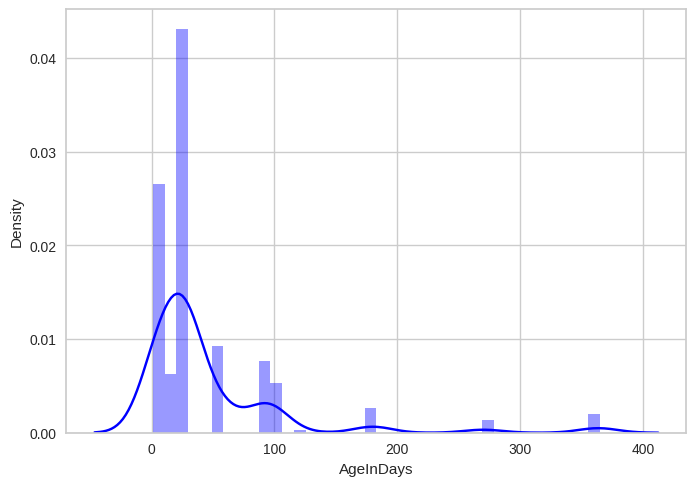

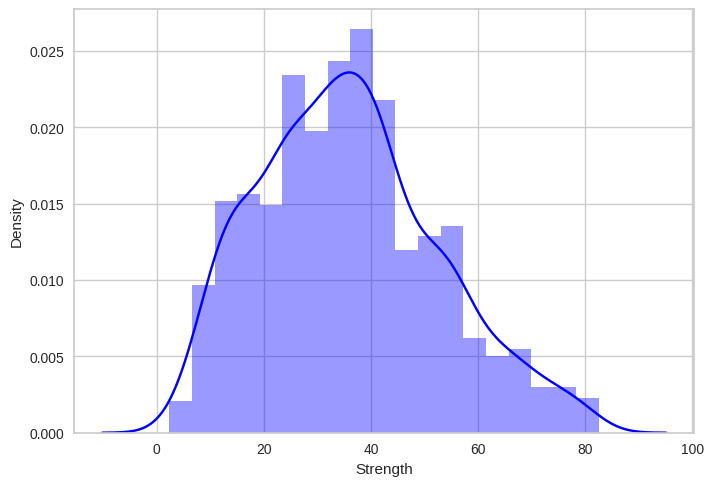

In [18]:
# Distplot for continous columns
for i in cdata.columns:
    sns.distplot(cdata[i], kde=True, color='Blue')
    plt.show()

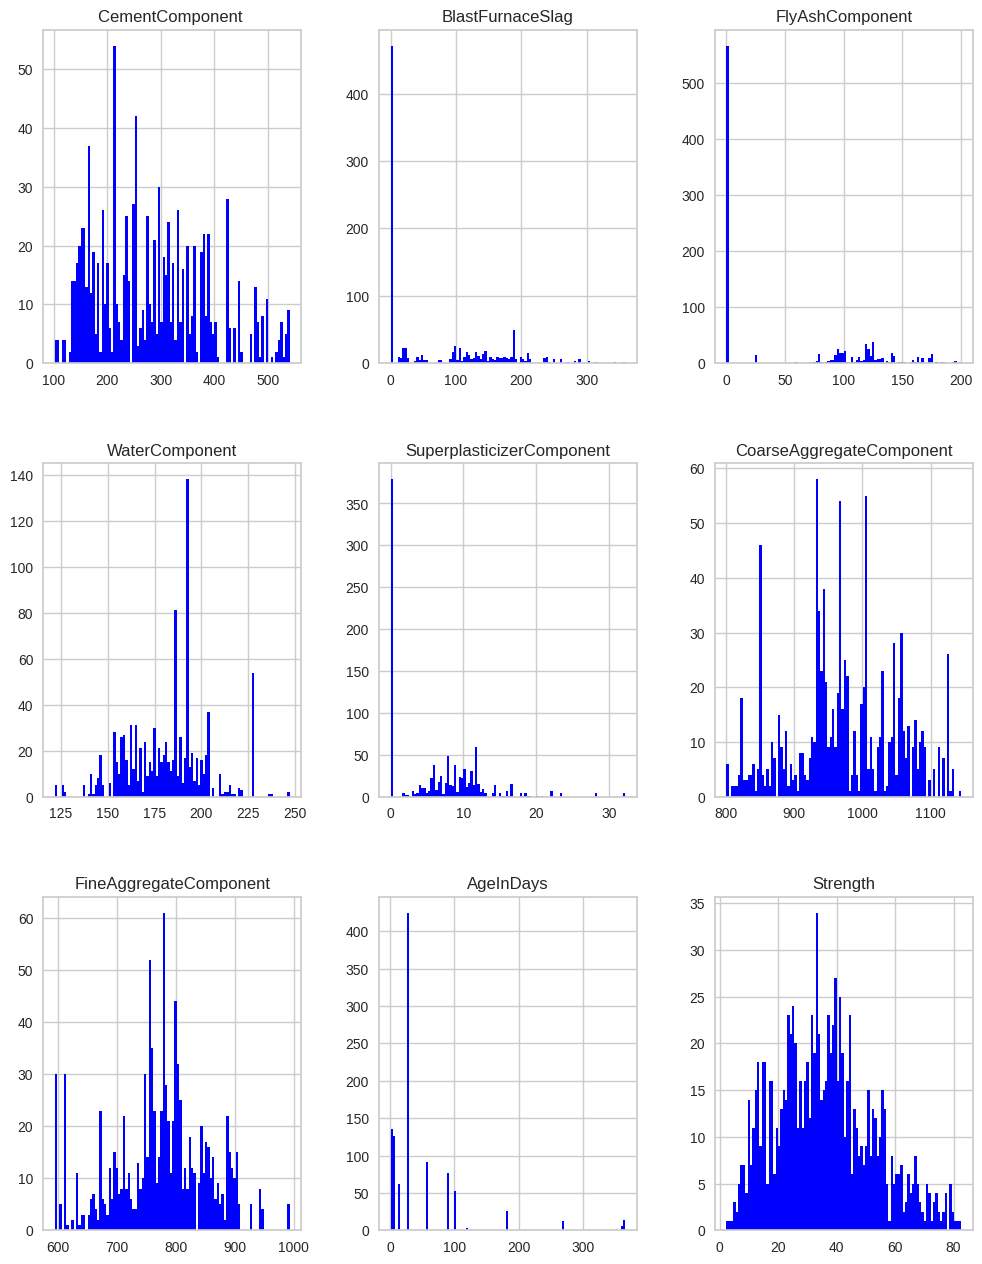

In [19]:
columns = list(cdata)[:]
cdata[columns].hist(stacked=False, bins=100, figsize=(12,55), layout=(10,3), color='Blue');

In [20]:
# ##Value counts of all categorical columns.
for i in cdata.columns:
    k=cdata[i].value_counts(normalize=True)
    print('\n',i,'\n', k,'\n')


 CementComponent  
 CementComponent 
362.6    0.019417
425.0    0.019417
251.4    0.014563
446.0    0.013592
310.0    0.013592
           ...   
276.4    0.000971
322.2    0.000971
148.5    0.000971
159.1    0.000971
260.9    0.000971
Name: proportion, Length: 278, dtype: float64 


 BlastFurnaceSlag 
 BlastFurnaceSlag
0.0      0.457282
189.0    0.029126
106.3    0.019417
24.0     0.013592
20.0     0.011650
           ...   
163.9    0.000971
259.7    0.000971
139.4    0.000971
186.7    0.000971
100.5    0.000971
Name: proportion, Length: 185, dtype: float64 


 FlyAshComponent 
 FlyAshComponent
0.0      0.549515
118.3    0.019417
141.0    0.015534
24.5     0.014563
79.0     0.013592
           ...   
86.5     0.000971
90.3     0.000971
115.6    0.000971
108.6    0.000971
78.3     0.000971
Name: proportion, Length: 156, dtype: float64 


 WaterComponent 
 WaterComponent
192.0    0.114563
228.0    0.052427
185.7    0.044660
203.5    0.034951
186.0    0.027184
           ...   
183.2   

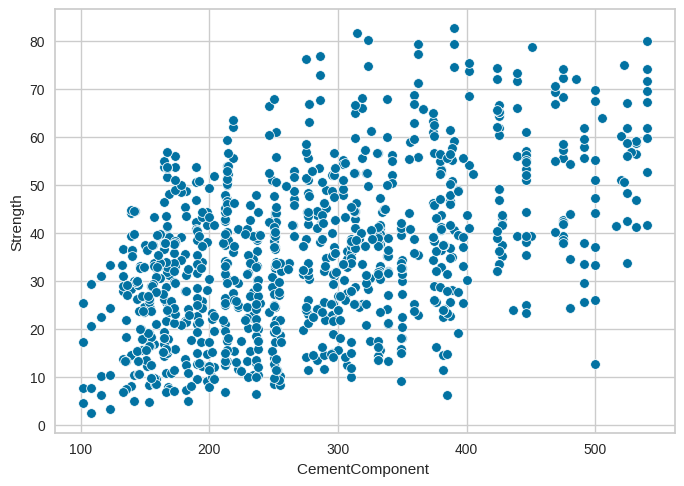

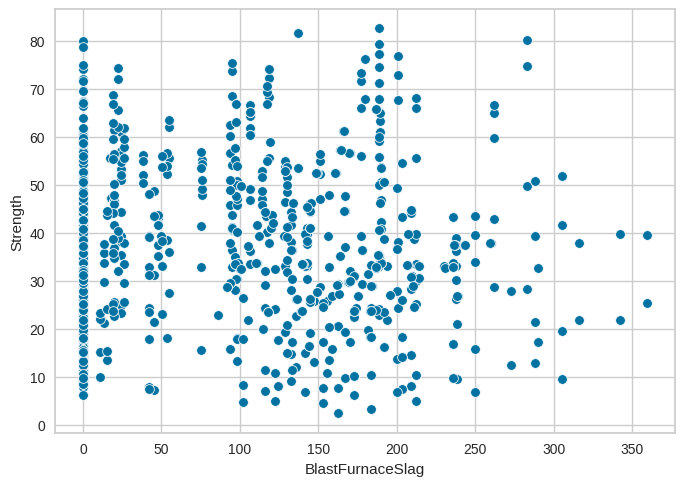

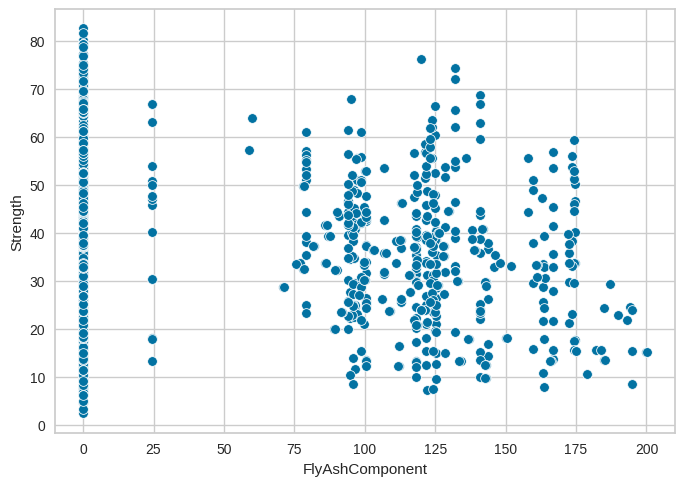

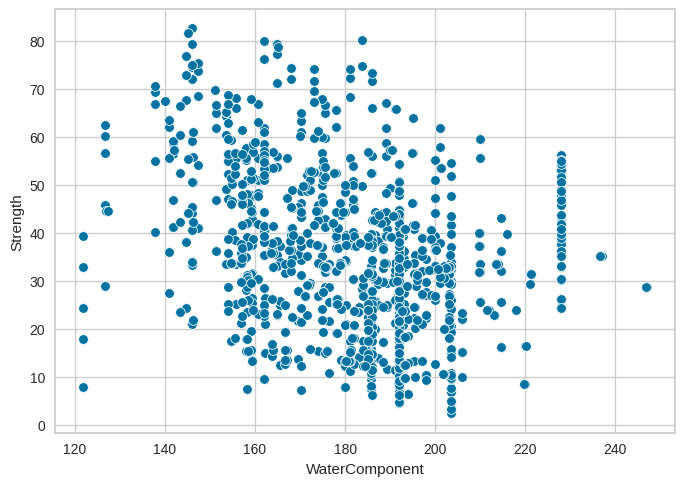

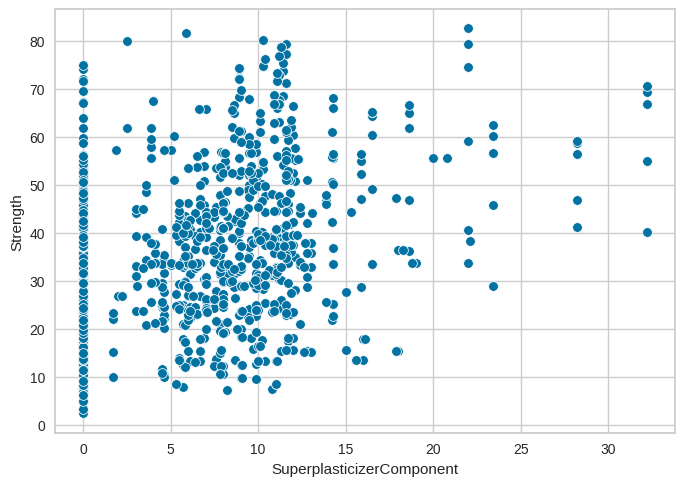

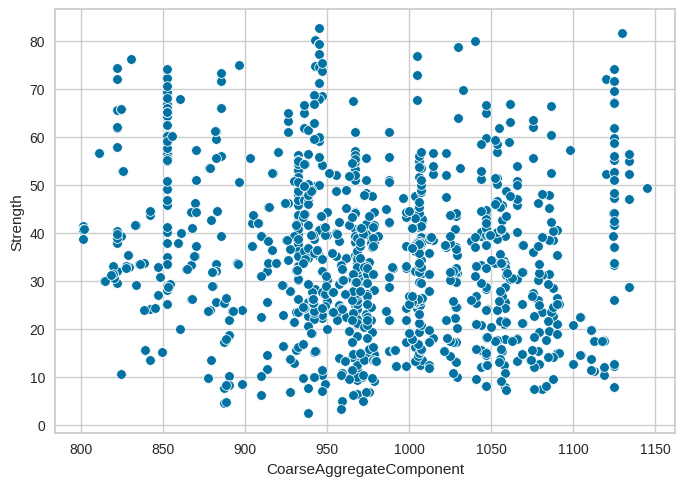

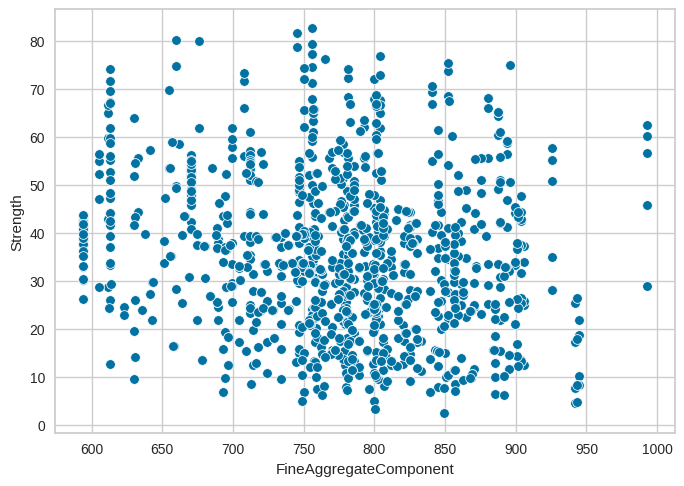

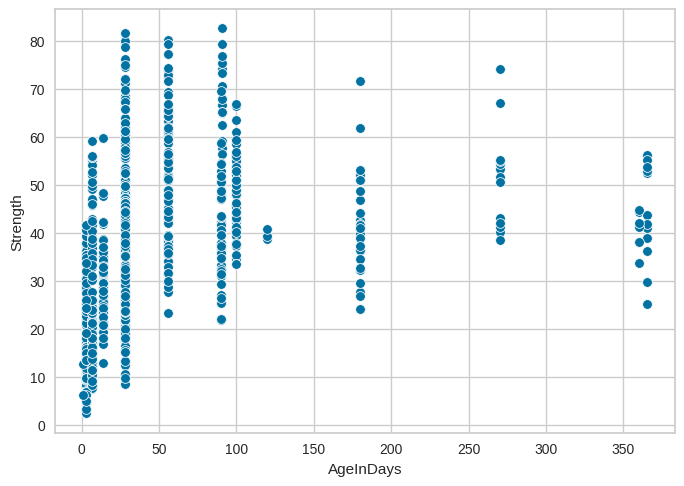

In [23]:
# Checking influence on Target variable
for i in cdata.columns[:-1]:
    sns.scatterplot(x=cdata[i], y=cdata['Strength'])
    plt.show()

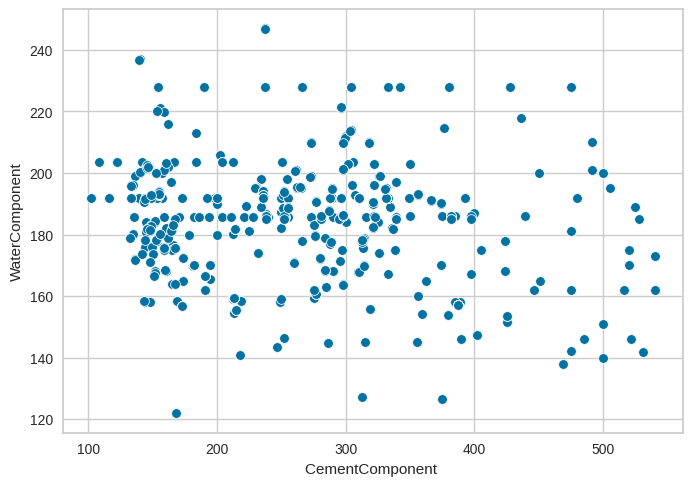

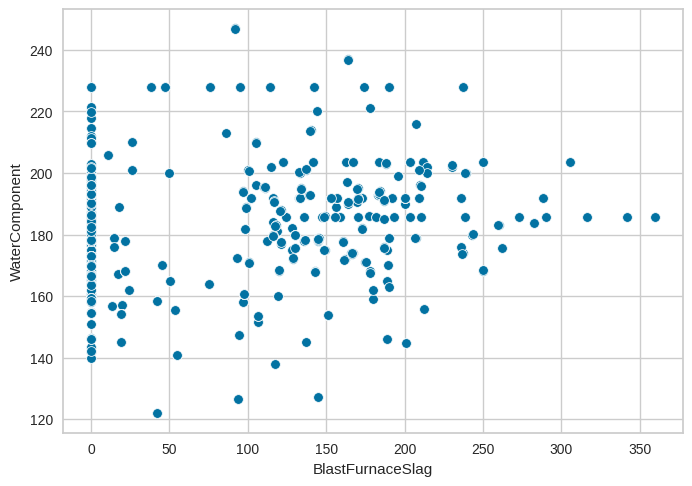

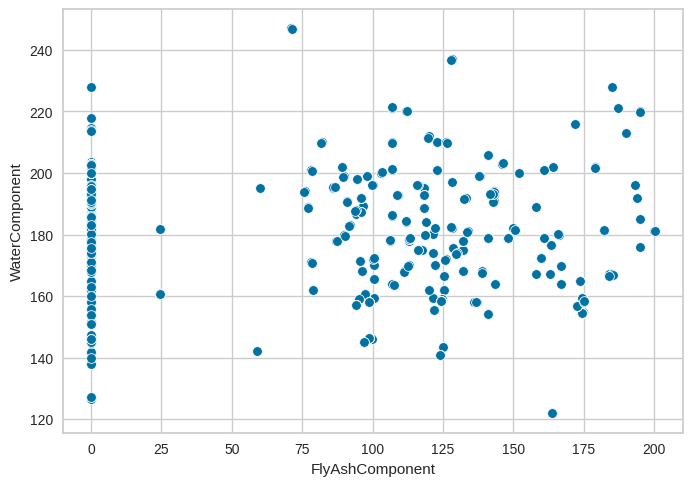

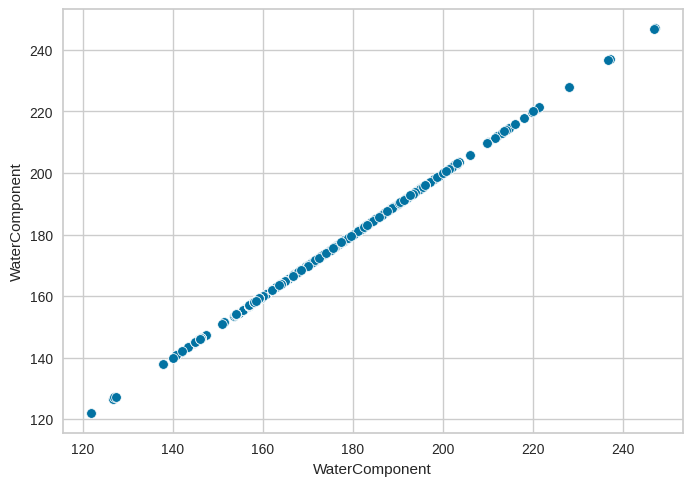

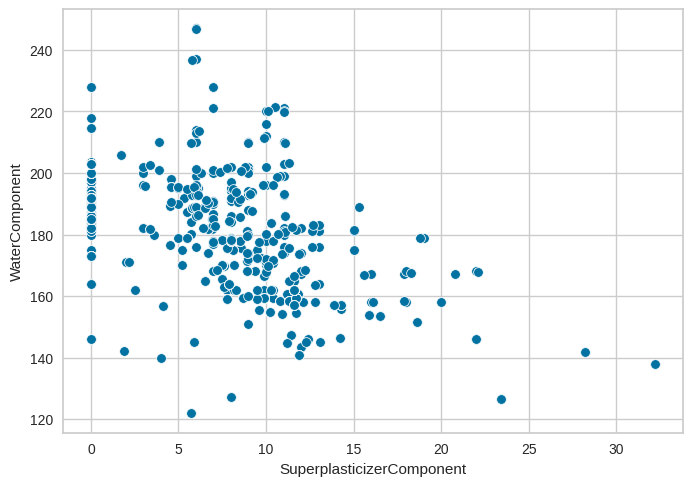

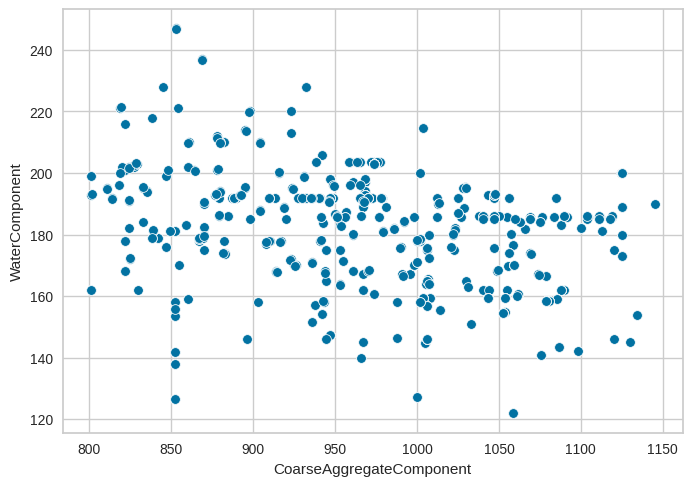

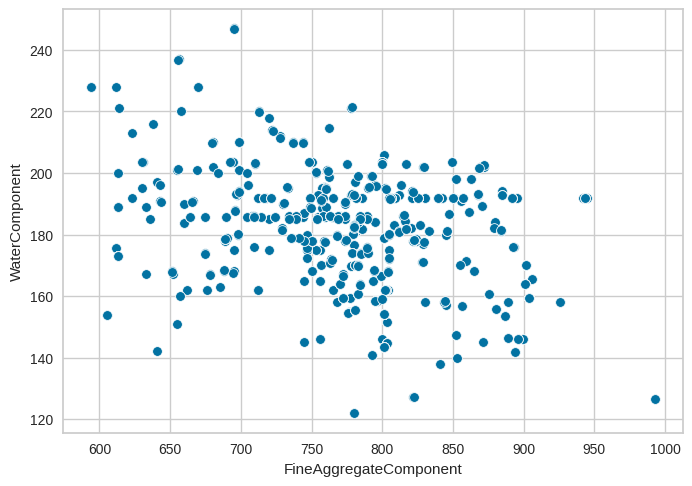

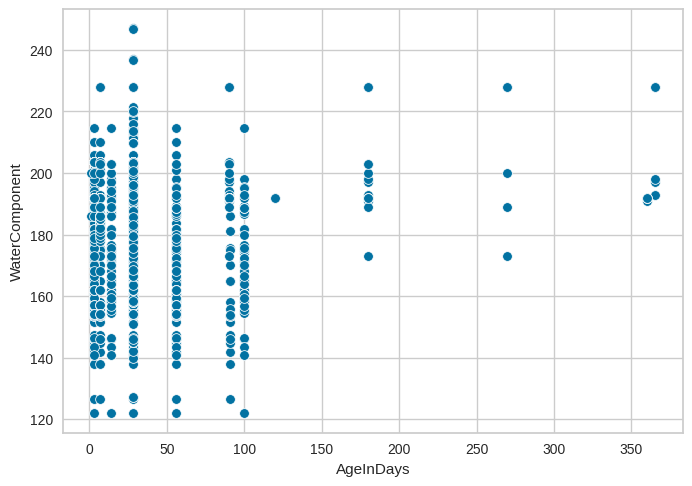

In [25]:
# Checking influence on water
for i in cdata.columns[:-1]:
    sns.scatterplot(x=cdata[i], y=cdata['WaterComponent'])
    plt.show()

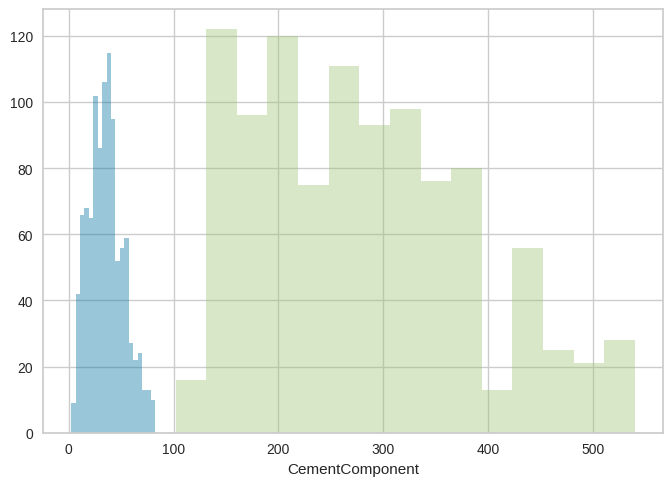

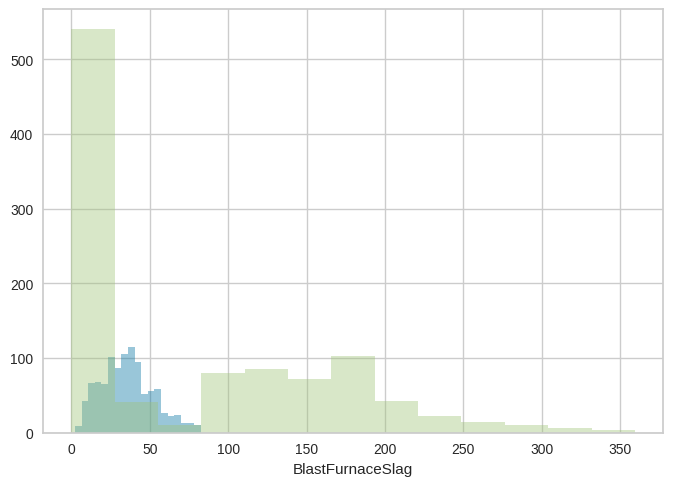

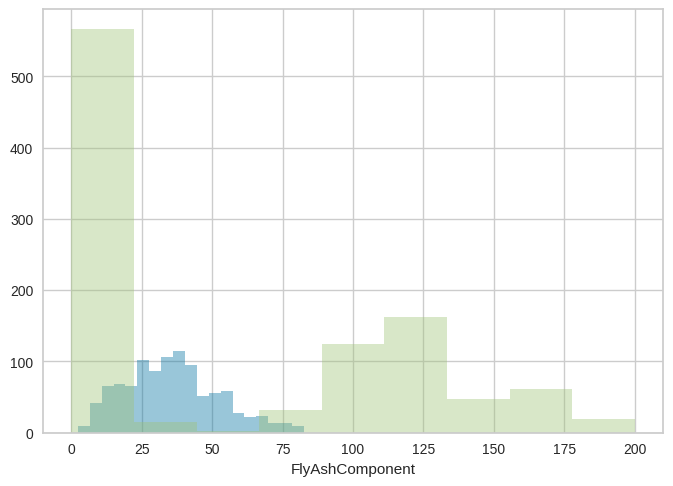

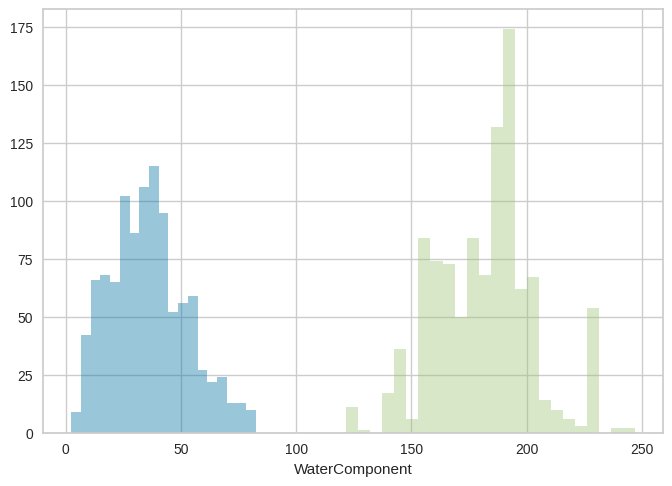

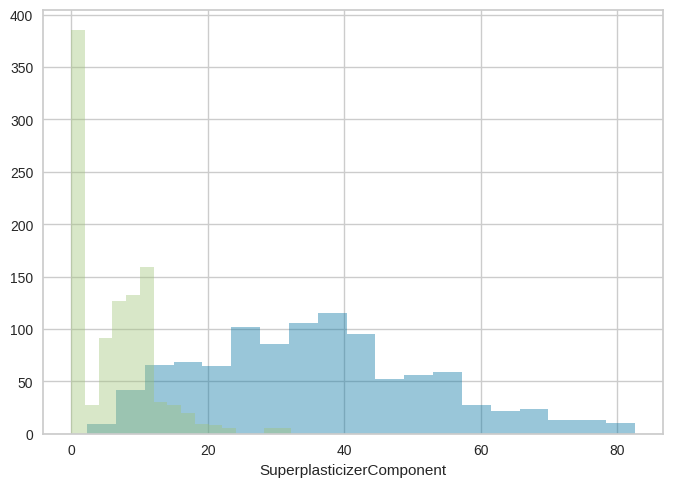

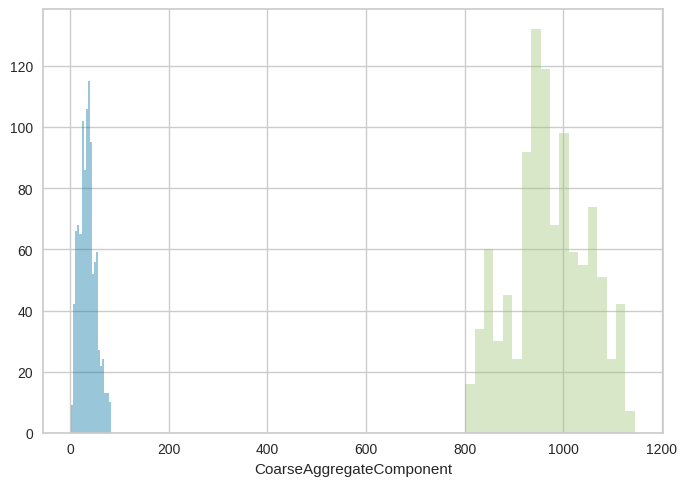

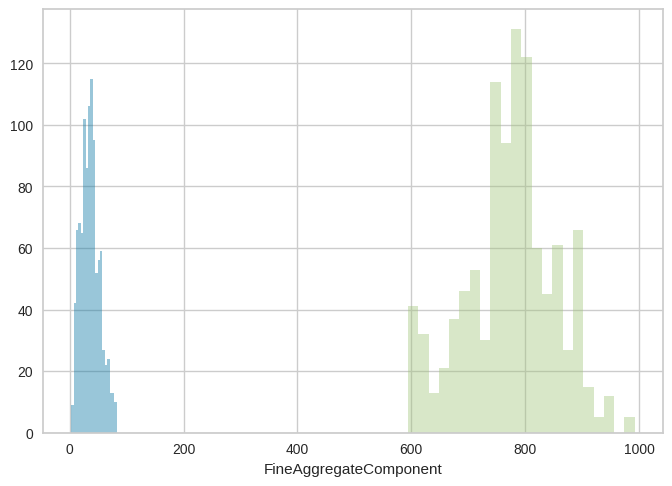

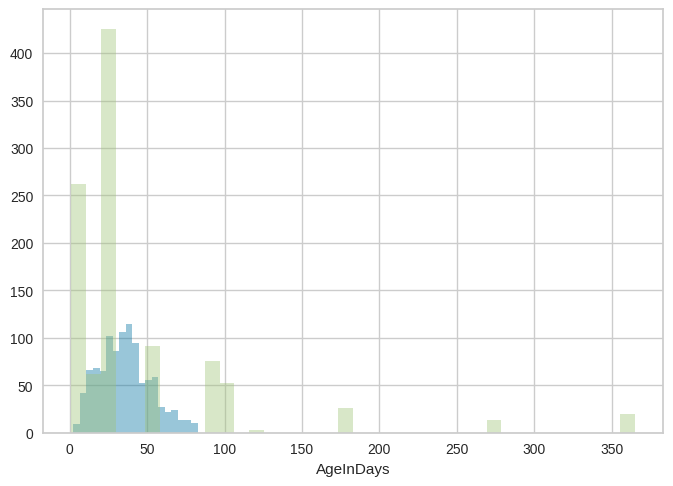

In [33]:
cdata.columns = cdata.columns.str.strip()

for i in ['CementComponent','BlastFurnaceSlag','FlyAshComponent','WaterComponent','SuperplasticizerComponent','CoarseAggregateComponent','FineAggregateComponent','AgeInDays']:
    sns.distplot(cdata['Strength'],  kde=False, label='Strength')
    sns.distplot(cdata[i],  kde=False,label=i)
    plt.show()

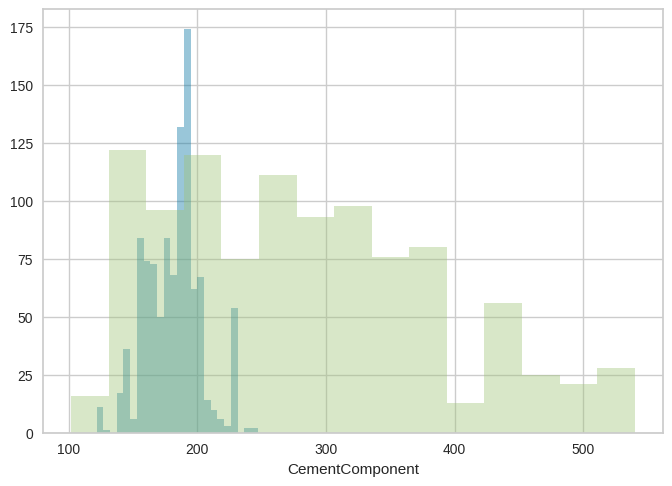

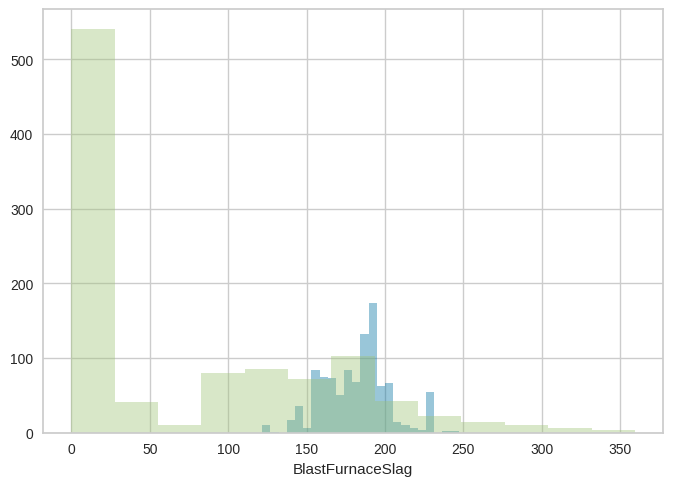

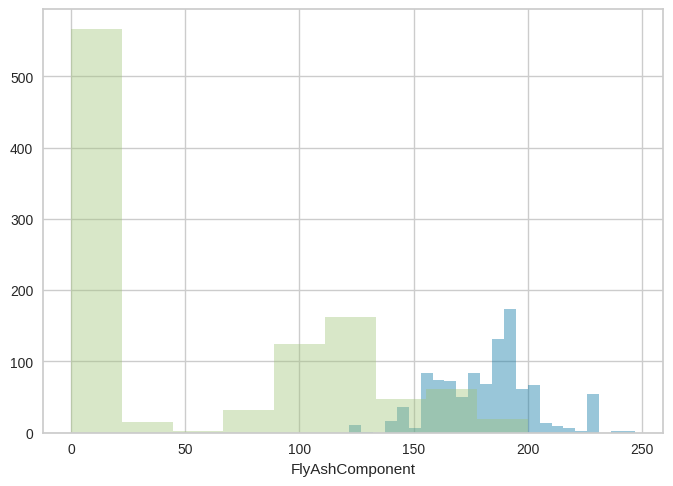

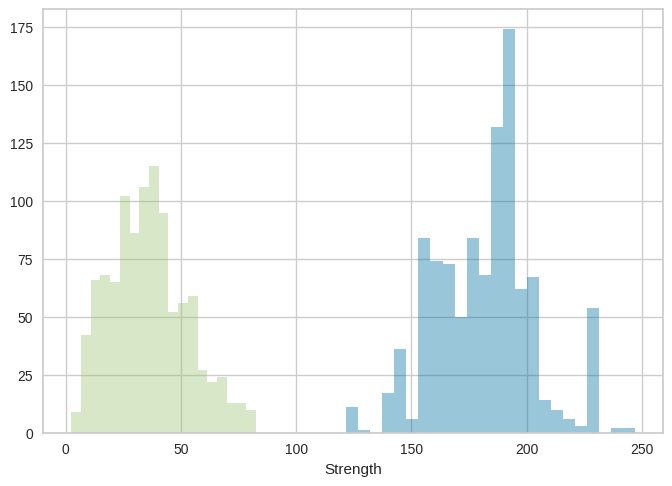

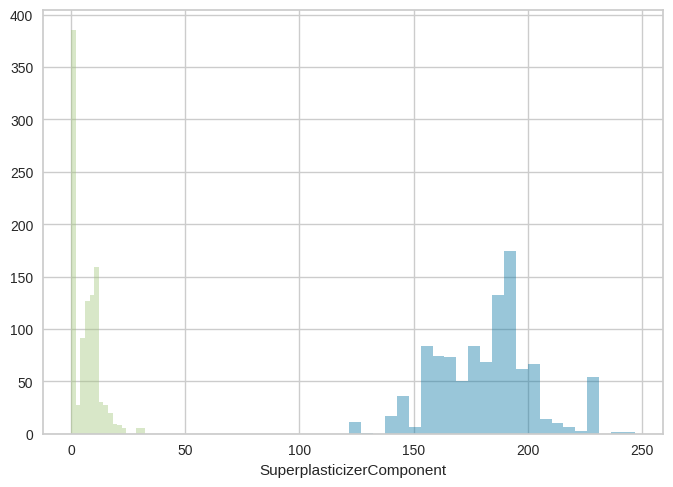

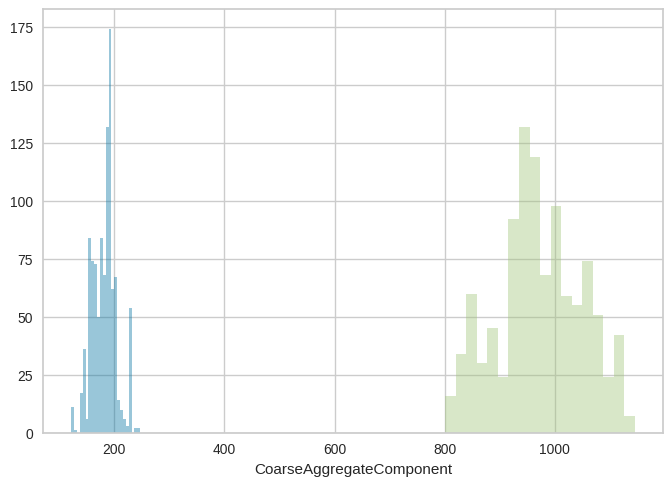

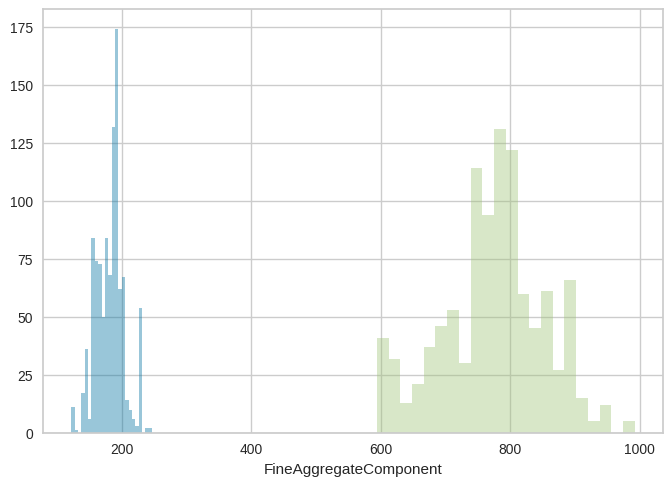

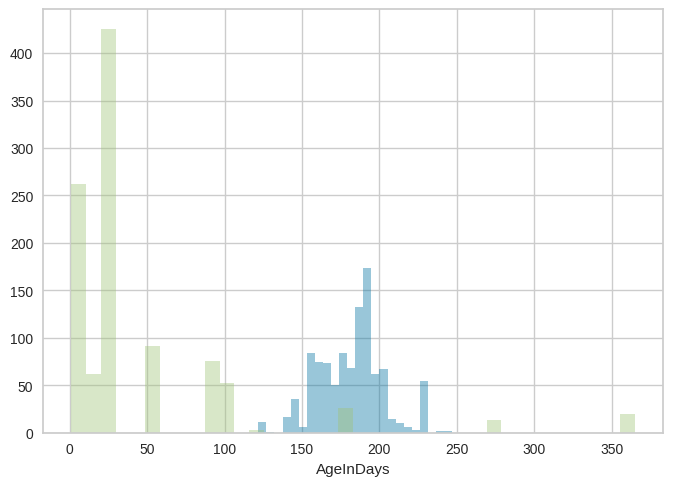

In [34]:
# Water and other variable comparison
for i in ['CementComponent','BlastFurnaceSlag','FlyAshComponent','Strength','SuperplasticizerComponent','CoarseAggregateComponent','FineAggregateComponent','AgeInDays']:
    sns.distplot(cdata['WaterComponent'],  kde=False, label='WaterComponent')
    sns.distplot(cdata[i],  kde=False,label=i)
    plt.show()

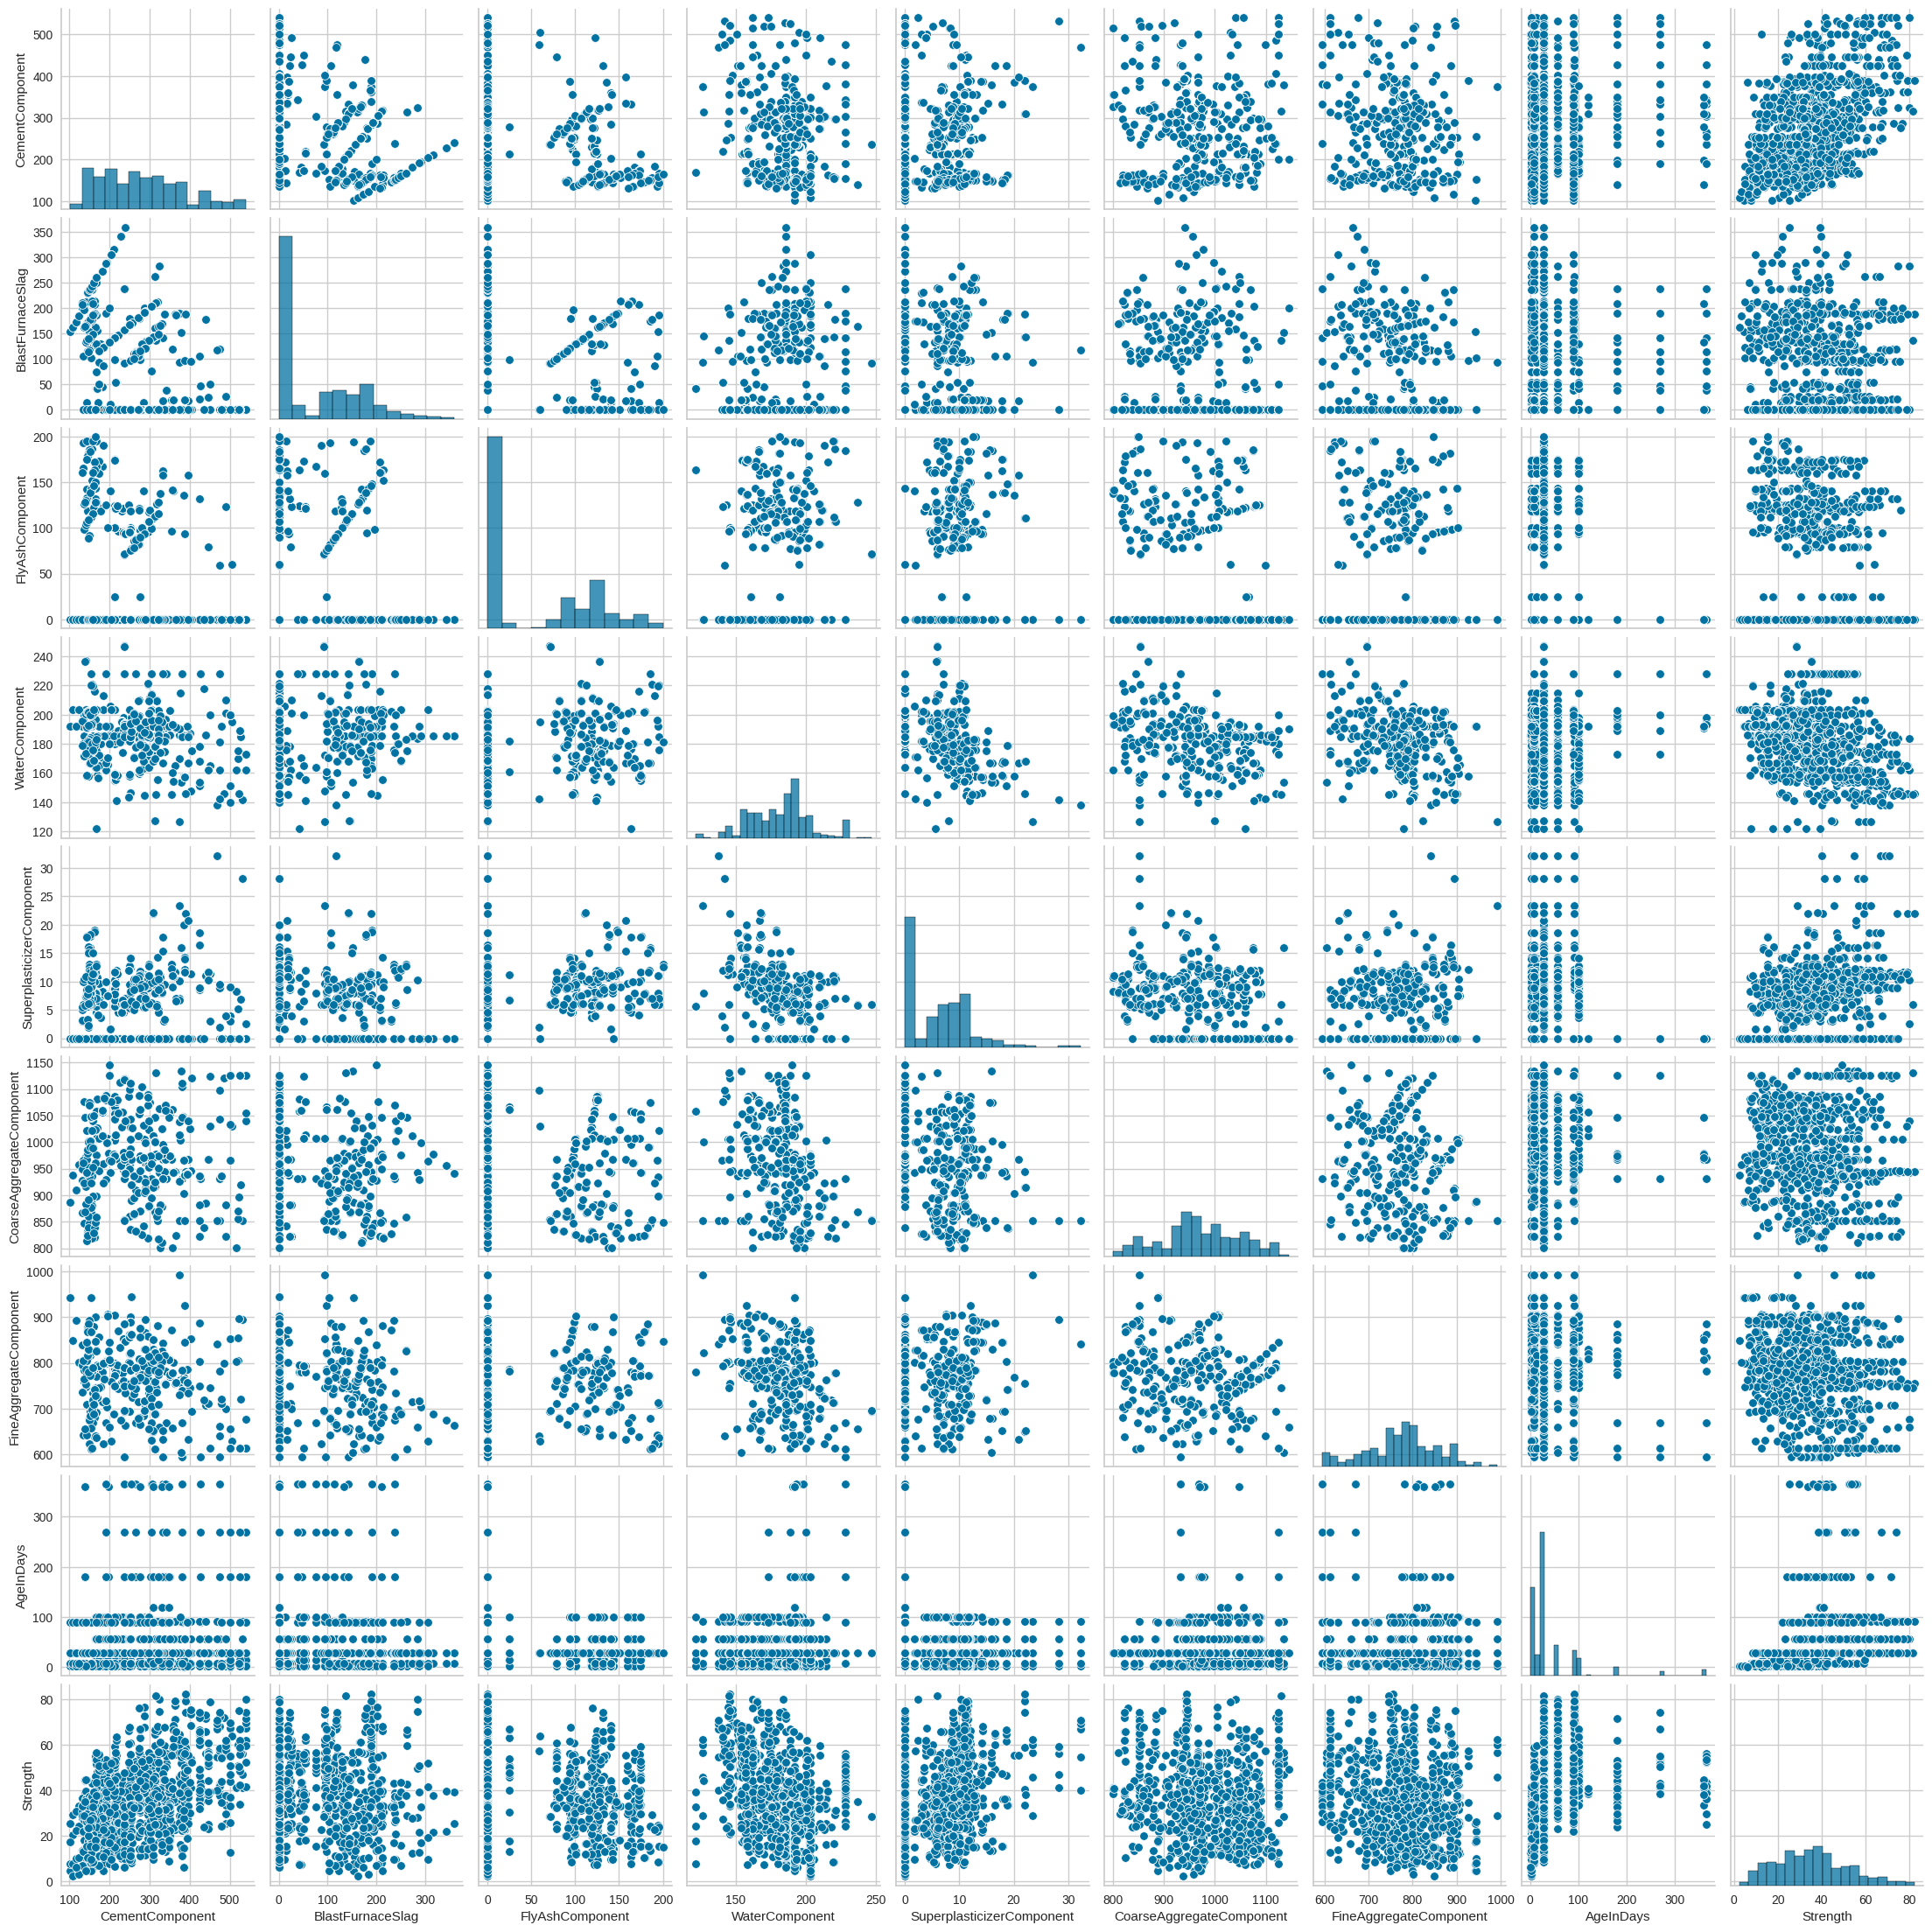

In [35]:
sns.pairplot(data=cdata)

<Axes: >

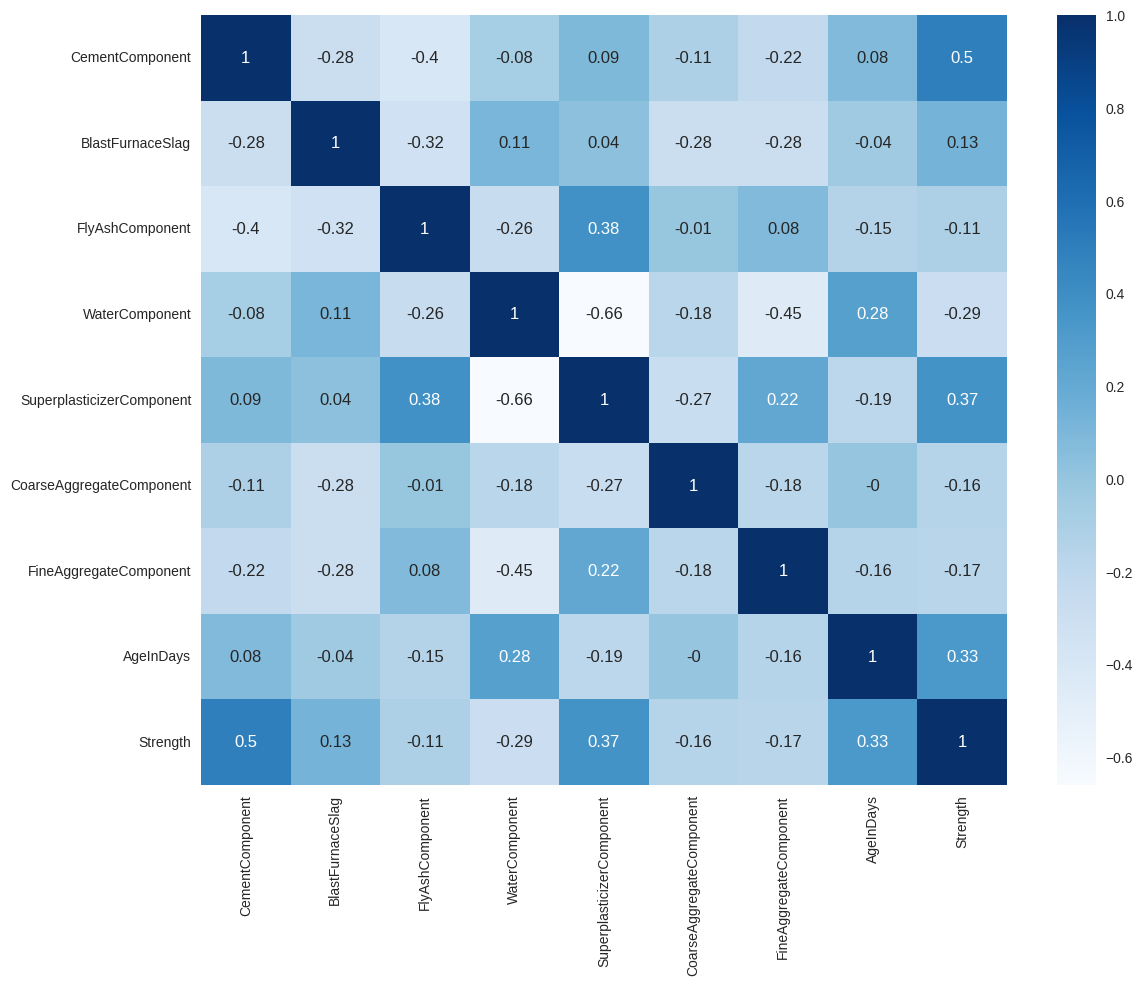

In [37]:
plt.figure (figsize = (13,10))
c = cdata.corr().round(2)
sns.heatmap(c, annot=True,cmap='Blues')

<Axes: xlabel='AgeInDays', ylabel='mean'>

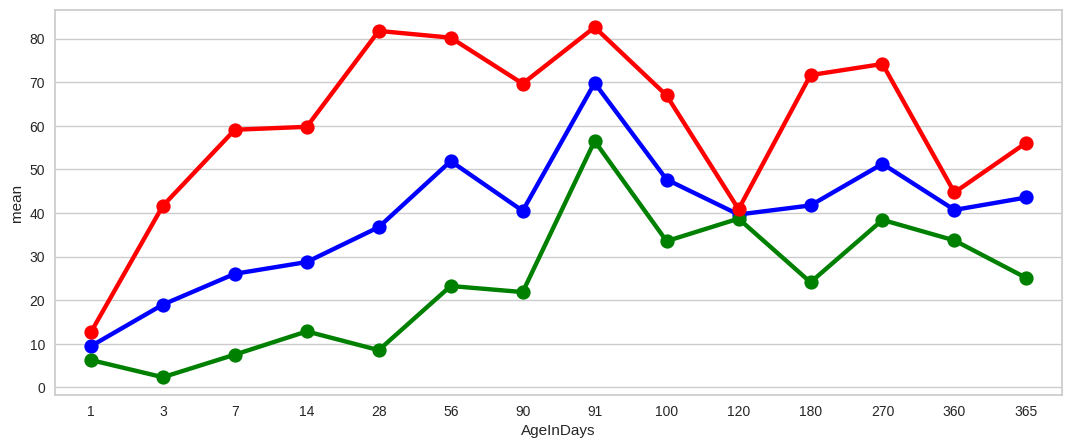

In [44]:
strength_by_age=cdata.groupby("AgeInDays")["Strength"].describe().reset_index()

fig=plt.figure(figsize=(13,5))
sns.pointplot(x="AgeInDays",y="mean",data=strength_by_age, color="blue")
sns.pointplot(x="AgeInDays",y="min",data=strength_by_age, color="green")
sns.pointplot(x="AgeInDays",y="max",data=strength_by_age, color="red")

In [45]:
# Remove Duplicates
cdata.drop_duplicates(subset = None,
                     keep = 'first', inplace = True)

In [46]:
# add 0.001 for all the values of the data frame

cdata = cdata + 0.001

In [47]:
cdata.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0          540.001             0.001            0.001         162.001   
1          540.001             0.001            0.001         162.001   
2          332.501           142.501            0.001         228.001   
3          332.501           142.501            0.001         228.001   
4          198.601           132.401            0.001         192.001   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                      2.501                  1040.001   
1                      2.501                  1055.001   
2                      0.001                   932.001   
3                      0.001                   932.001   
4                      0.001                   978.401   

   FineAggregateComponent  AgeInDays  Strength  
0                 676.001     28.001    79.991  
1                 676.001     28.001    61.891  
2                 594.001    270.001    40.271  
3                 594.001    365.001    41.051  
4                 825.501    360.001    44.301

In [48]:
cdata.describe().T

count        mean         std      min      25%  \
CementComponent            1005.0  278.632343  104.344261  102.001  190.701   
BlastFurnaceSlag           1005.0   72.044483   86.170807    0.001    0.001   
FlyAshComponent            1005.0   55.537318   64.207969    0.001    0.001   
WaterComponent             1005.0  182.076323   21.339334  121.801  166.601   
SuperplasticizerComponent  1005.0    6.034234    5.919967    0.001    0.001   
CoarseAggregateComponent   1005.0  974.377816   77.579667  801.001  932.001   
FineAggregateComponent     1005.0  772.689259   80.340435  594.001  724.301   
AgeInDays                  1005.0   45.857716   63.734692    1.001    7.001   
Strength                   1005.0   35.251378   16.284815    2.331   23.521   

                               50%       75%       max  
CementComponent            265.001   349.001   540.001  
BlastFurnaceSlag            20.001   142.501   359.401  
FlyAshComponent              0.001   118.301   200.101  
WaterComponent             185.701   192.901   247.001  
SuperplasticizerComponent    6.101    10.001    32.201  
CoarseAggregateComponent   968.001  1031.001  1145.001  
FineAggregateComponent     780.001   822.201   992.601  
AgeInDays                   28.001    56.001   365.001  
Strength                    33.801    44.871    82.601

In [50]:
# Converting Age to months
cdata['month'] = cdata['AgeInDays']/30
cdata['month']=cdata['month'].round(0).astype(int)
cdata['month'].unique()

array([ 1,  9, 12,  3,  6,  0,  2,  4])

In [51]:
# Creating Dummies for Age columns
cdata1 = pd.get_dummies(cdata['month']).rename(columns=lambda x: 'month' + str(x))
cdata = pd.concat([cdata, cdata1], axis=1)
cdata.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0          540.001             0.001            0.001         162.001   
1          540.001             0.001            0.001         162.001   
2          332.501           142.501            0.001         228.001   
3          332.501           142.501            0.001         228.001   
4          198.601           132.401            0.001         192.001   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                      2.501                  1040.001   
1                      2.501                  1055.001   
2                      0.001                   932.001   
3                      0.001                   932.001   
4                      0.001                   978.401   

   FineAggregateComponent  AgeInDays  Strength  month  month0  month1  month2  \
0                 676.001     28.001    79.991      1   False    True   False   
1                 676.001     28.001    61.891      1   False    True   False   
2                 594.001    270.001    40.271      9   False   False   False   
3                 594.001    365.001    41.051     12   False   False   False   
4                 825.501    360.001    44.301     12   False   False   False   

   month3  month4  month6  month9  month12  
0   False   False   False   False    False  
1   False   False   False   False    False  
2   False   False   False    True    False  
3   False   False   False   False     True  
4   False   False   False   False     True

In [53]:
# ADDING NEW FEATURES
# Predominantly concret is full of cement so creating new features by mulitply the features with cement

cdata['cement_slag'] = (cdata['CementComponent']*cdata['BlastFurnaceSlag'])/(cdata['CementComponent']+cdata['BlastFurnaceSlag'])
cdata['cement_ash'] = (cdata['CementComponent']*cdata['FlyAshComponent'])/(cdata['CementComponent']+cdata['FlyAshComponent'])
cdata['cement_superplastic'] = (cdata['CementComponent']*cdata['SuperplasticizerComponent'])/(cdata['CementComponent']+cdata['SuperplasticizerComponent'])
cdata['cement_coarseagg'] = (cdata['CementComponent']*cdata['CoarseAggregateComponent'])/(cdata['CementComponent']+cdata['CoarseAggregateComponent'])
cdata['cement_fineagg'] = (cdata['CementComponent']*cdata['FineAggregateComponent'])/(cdata['CementComponent']+cdata['FineAggregateComponent'])

In [54]:
cdata.describe().T

count        mean         std         min  \
CementComponent            1005.0  278.632343  104.344261  102.001000   
BlastFurnaceSlag           1005.0   72.044483   86.170807    0.001000   
FlyAshComponent            1005.0   55.537318   64.207969    0.001000   
WaterComponent             1005.0  182.076323   21.339334  121.801000   
SuperplasticizerComponent  1005.0    6.034234    5.919967    0.001000   
CoarseAggregateComponent   1005.0  974.377816   77.579667  801.001000   
FineAggregateComponent     1005.0  772.689259   80.340435  594.001000   
AgeInDays                  1005.0   45.857716   63.734692    1.001000   
Strength                   1005.0   35.251378   16.284815    2.331000   
month                      1005.0    1.477612    2.138796    0.000000   
cement_slag                1005.0   41.192925   45.291285    0.001000   
cement_ash                 1005.0   34.893988   38.933985    0.001000   
cement_superplastic        1005.0    5.779094    5.613799    0.001000   
cement_coarseagg           1005.0  211.112231   60.923276   91.481098   
cement_fineagg             1005.0  198.130619   52.872075   92.035306   

                                  25%         50%          75%          max  
CementComponent            190.701000  265.001000   349.001000   540.001000  
BlastFurnaceSlag             0.001000   20.001000   142.501000   359.401000  
FlyAshComponent              0.001000    0.001000   118.301000   200.101000  
WaterComponent             166.601000  185.701000   192.901000   247.001000  
SuperplasticizerComponent    0.001000    6.101000    10.001000    32.201000  
CoarseAggregateComponent   932.001000  968.001000  1031.001000  1145.001000  
FineAggregateComponent     724.301000  780.001000   822.201000   992.601000  
AgeInDays                    7.001000   28.001000    56.001000   365.001000  
Strength                    23.521000   33.801000    44.871000    82.601000  
month                        0.000000    1.000000     2.000000    12.000000  
cement_slag                  0.001000   19.018106    80.526374   150.935968  
cement_ash                   0.001000    0.001000    75.517352   113.020413  
cement_superplastic          0.001000    5.889853     9.630558    30.132165  
cement_coarseagg           161.973079  205.762006   257.380606   364.865427  
cement_fineagg             153.815868  196.526284   236.392542   333.209522

<Axes: >

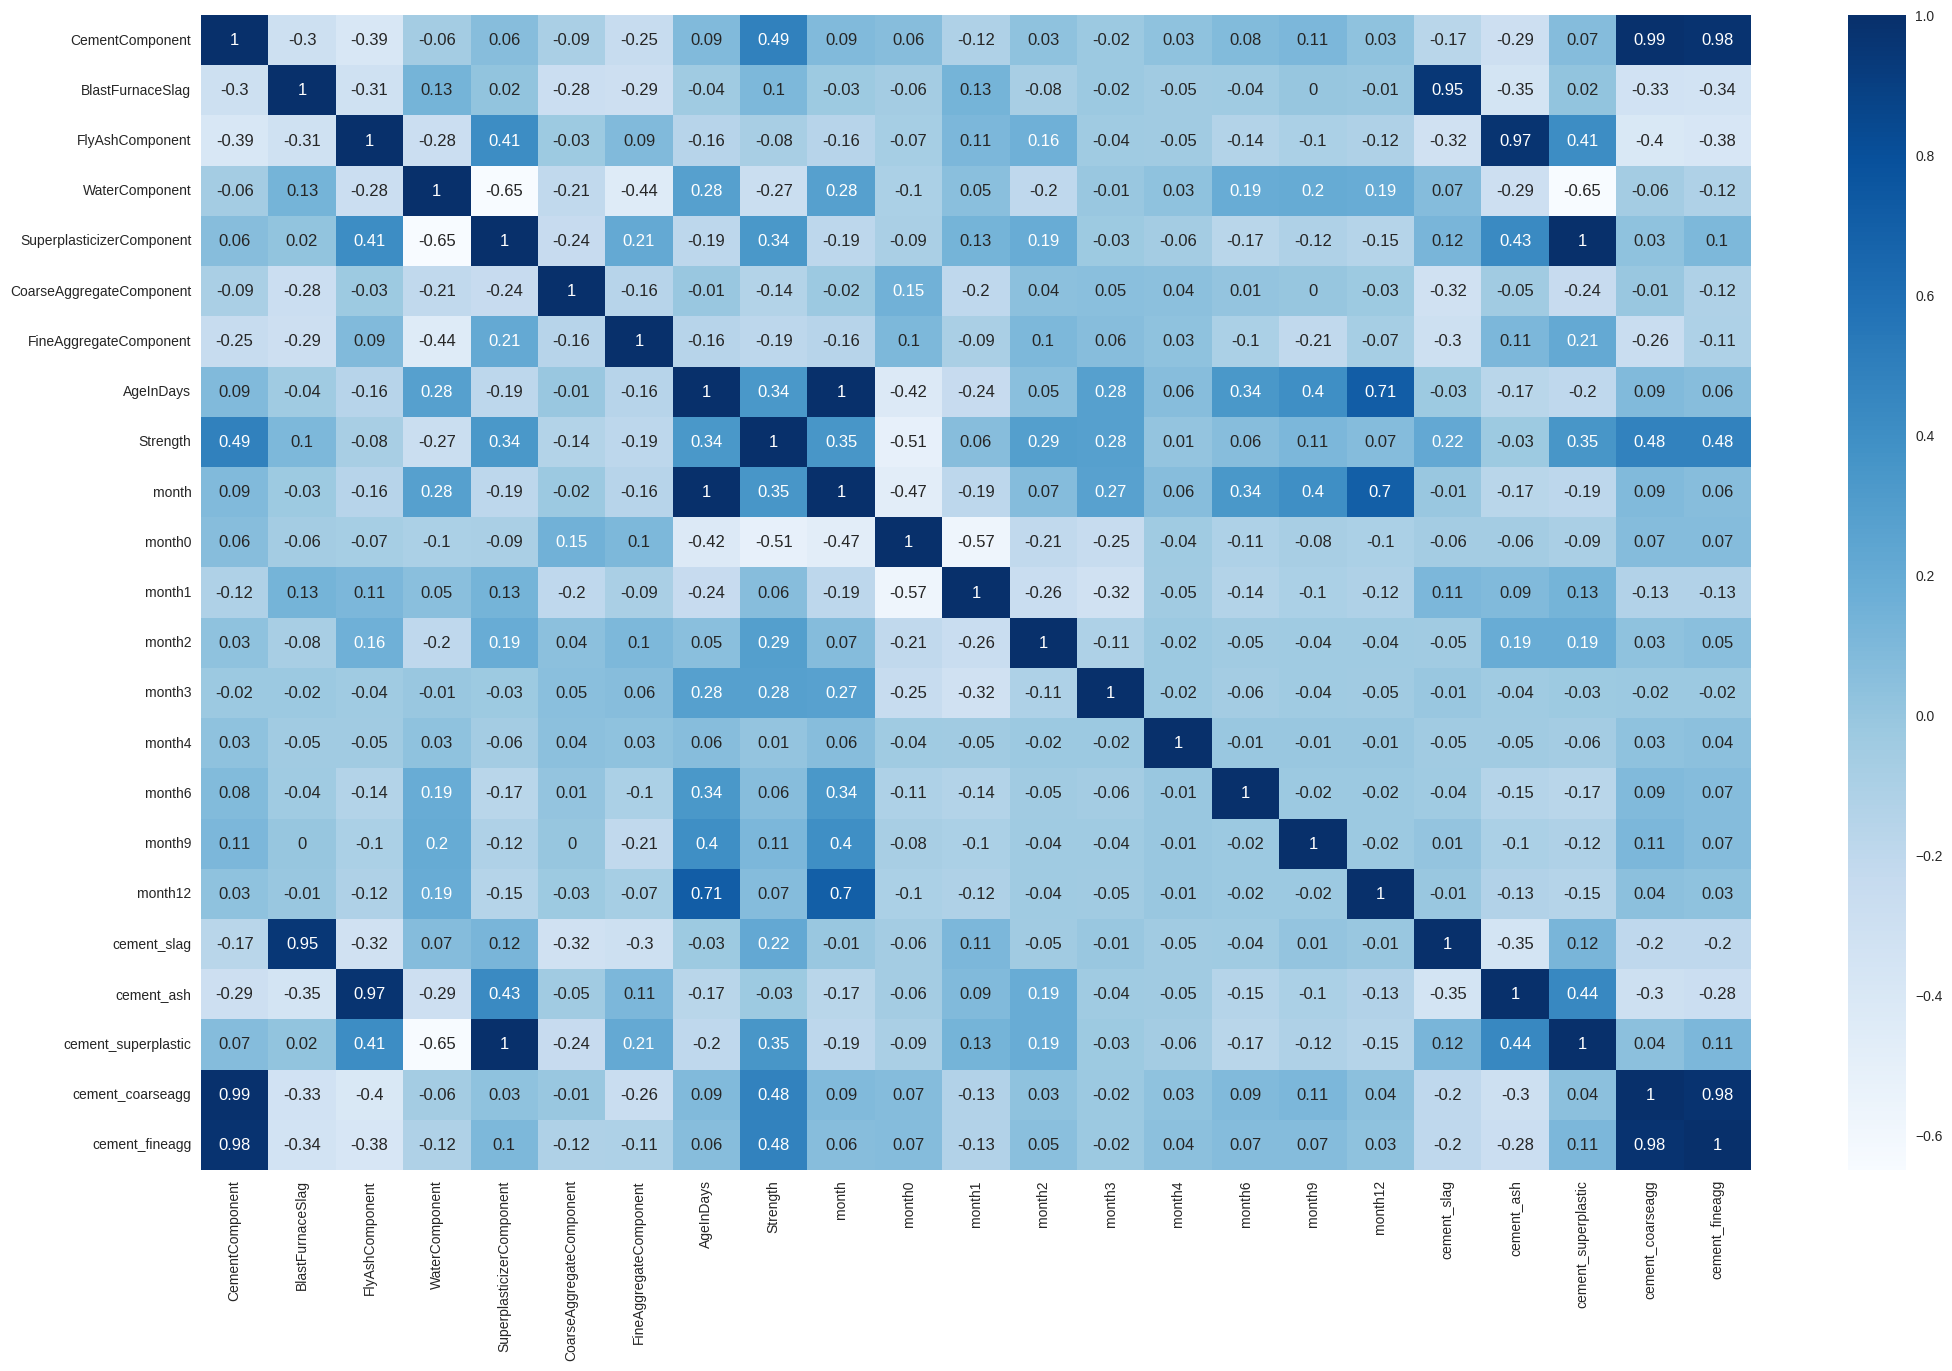

In [55]:
plt.figure (figsize = (25,15))
new = cdata.corr().round(2)
sns.heatmap(new, annot=True,cmap='Blues')

In [56]:
# FEATURE INCLUENTIAL TARGET VARIABLES
new1 = cdata.corr().sort_values('Strength', ascending=False).index
new1

Index(['Strength', 'CementComponent', 'cement_fineagg', 'cement_coarseagg',
       'month', 'cement_superplastic', 'SuperplasticizerComponent',
       'AgeInDays', 'month2', 'month3', 'cement_slag', 'month9',
       'BlastFurnaceSlag', 'month12', 'month6', 'month1', 'month4',
       'cement_ash', 'FlyAshComponent', 'CoarseAggregateComponent',
       'FineAggregateComponent', 'WaterComponent', 'month0'],
      dtype='object')

In [57]:
#X = cdata.drop(['strength','age','month', 'month4', 'month12'], axis=1)
X = cdata.drop(['Strength'], axis=1)
X.head()
y = cdata['Strength']
X.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0          540.001             0.001            0.001         162.001   
1          540.001             0.001            0.001         162.001   
2          332.501           142.501            0.001         228.001   
3          332.501           142.501            0.001         228.001   
4          198.601           132.401            0.001         192.001   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                      2.501                  1040.001   
1                      2.501                  1055.001   
2                      0.001                   932.001   
3                      0.001                   932.001   
4                      0.001                   978.401   

   FineAggregateComponent  AgeInDays  month  month0  ...  month3  month4  \
0                 676.001     28.001      1   False  ...   False   False   
1                 676.001     28.001      1   False  ...   False   False   
2                 594.001    270.001      9   False  ...   False   False   
3                 594.001    365.001     12   False  ...   False   False   
4                 825.501    360.001     12   False  ...   False   False   

   month6  month9  month12  cement_slag  cement_ash  cement_superplastic  \
0   False   False    False      0.00100       0.001              2.48947   
1   False   False    False      0.00100       0.001              2.48947   
2   False    True    False     99.75058       0.001              0.00100   
3   False   False     True     99.75058       0.001              0.00100   
4   False   False     True     79.44052       0.001              0.00100   

   cement_coarseagg  cement_fineagg  
0        355.443588      300.197875  
1        357.179236      300.197875  
2        245.069810      213.173772  
3        245.069810      213.173772  
4        165.090133      160.086909  

[5 rows x 22 columns]

In [58]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=7)

In [59]:
#Degree 1
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

pipeline=Pipeline([('scalar',StandardScaler()),
                   ('reg',DecisionTreeRegressor(random_state=7))])


pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

0.999188721431624
0.7298176635048146


In [60]:
#Degree 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

0.999188721431624
0.7313910130595667


In [61]:
#Degree 3

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

0.999188721431624
0.7479737580434637


In [62]:
from sklearn.model_selection import cross_val_score, KFold
k = KFold(random_state=7, n_splits=5, shuffle=True)

# KFold will split the data in 5 equal parts

In [63]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

# Blanks list to store model name, cross validated r2 score (mean and standard deviation) and RMSE

In [64]:
# Linear Regression
## Since the dataset is small theefore using compete dataset for cv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

pipeline.fit(X_train, y_train)


algo.append('Linear Regression')
cv_r2_mean.append(cross_val_score(pipeline, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [65]:
# Decision Tree

model = DecisionTreeRegressor(random_state=7)

model.fit(X_train, y_train)


algo.append('Decision Tree')
cv_r2_mean.append(cross_val_score(model,X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [66]:
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))
print(pd.DataFrame(dt_model.feature_importances_,columns=["Imp"],index=X_train.columns))

0.999188721431624
0.7830242295301374
                                    Imp
CementComponent            1.473220e-01
BlastFurnaceSlag           3.188081e-02
FlyAshComponent            2.781778e-03
WaterComponent             2.766642e-02
SuperplasticizerComponent  1.134398e-02
CoarseAggregateComponent   2.482933e-02
FineAggregateComponent     2.521826e-02
AgeInDays                  3.173690e-01
month                      5.250986e-03
month0                     0.000000e+00
month1                     2.533140e-03
month2                     6.484634e-04
month3                     1.578589e-03
month4                     0.000000e+00
month6                     1.202863e-04
month9                     7.138100e-05
month12                    1.101100e-07
cement_slag                9.201396e-02
cement_ash                 1.586799e-02
cement_superplastic        1.275305e-01
cement_coarseagg           4.744050e-03
cement_fineagg             1.612289e-01


In [67]:
#Lasso
from sklearn.linear_model import Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', Lasso())
])

pipeline.fit(X_train, y_train)


algo.append('Lasso')
cv_r2_mean.append(cross_val_score(pipeline, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [68]:
lasso_model=Lasso()
lasso_model.fit(X_train,y_train)

print(lasso_model.score(X_train,y_train))
print(lasso_model.score(X_test,y_test))
print(pd.DataFrame(lasso_model.coef_,columns=["Imp"],index=X_train.columns))

0.743925866286614
0.7711143757459038
                                 Imp
CementComponent             0.117155
BlastFurnaceSlag            0.055949
FlyAshComponent             0.007561
WaterComponent             -0.139805
SuperplasticizerComponent   0.000000
CoarseAggregateComponent    0.030254
FineAggregateComponent      0.033021
AgeInDays                   0.075023
month                       0.000000
month0                    -10.360720
month1                      0.000000
month2                      0.000000
month3                      0.000000
month4                      0.000000
month6                     -0.000000
month9                     -0.000000
month12                    -0.000000
cement_slag                 0.100417
cement_ash                  0.140726
cement_superplastic         0.000000
cement_coarseagg            0.003703
cement_fineagg             -0.000000


In [69]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(X_train, y_train)


algo.append('Random Forest')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [70]:
# Bagging
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(X_train, y_train)


algo.append('Bagging')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [71]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(X_train, y_train)


algo.append('AdaBoost')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [72]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(X_train, y_train)

algo.append('Gradient Boosting')
cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
cv_r2_std.append(cross_val_score(model, X, y, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

In [73]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

CV R2 score mean  CV R2 score std   CV RMSE
Model                                                         
Linear Regression          0.825210         0.009970  6.779969
Decision Tree              0.813655         0.045891  6.990597
Lasso                      0.747381         0.015093  8.186006
Random Forest              0.903240         0.014116  5.071947
Bagging                    0.889600         0.024864  5.421469
AdaBoost                   0.795713         0.006708  7.340698
Gradient Boosting          0.901382         0.006438  5.121328

In [74]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=7)

params = {
    'bootstrap': [True, False],
    'max_depth': [3, 4, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 4],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [4, 25, 50]
}

grid = GridSearchCV(estimator=rf, param_grid=params, cv=k)

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(random_state=7),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 25, 50]})

In [75]:
from sklearn.metrics import mean_squared_error
model = ['Random forest after Grid search']
tr = [grid.score(X_train, y_train)]
te = [grid.score(X_test, y_test)]
rmse = [mean_squared_error(y_test, grid.predict(X_test))**0.5]

In [76]:
gb = GradientBoostingRegressor(random_state=7)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=7)

In [77]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=150, num=25)]   # returns evenly spaced 25 numbers
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num=5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num=10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate': learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r, cv=k, random_state=7)

# Fit the random search model
random.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   estimator=GradientBoostingRegressor(random_state=7),
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [5, 6, 7, 8, 10, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 54, 58, 62, 66, 70,
                                                         75, 79, 83, 87, 91, 95,
                                                         100, 104, 108, 112,
                                                         116, 120, 125, 129,
                                                         133, 137, 141, 145,
                                                         150]},
                   random_state=7)

In [78]:
random.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}

In [79]:
model.append('Gradient Boosting after RandomCV')
tr.append(random.score(X_train, y_train))
te.append(random.score(X_test, y_test))
rmse.append(mean_squared_error(y_test, random.predict(X_test))**0.5)

In [80]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

Training Score  Testing Score      RMSE
Model                                                                    
Random forest after Grid search         0.999189       0.885655  5.630841
Gradient Boosting after RandomCV        0.998783       0.889635  5.531986

In [81]:
concrete_XY=X.join(y)
values=concrete_XY.values

In [ ]:
from sklearn.utils import resample
n_iterations=1000
n_size=int(len(cdata)*1)

stats=list()
for i in range(n_iterations):
    train=resample(values,n_samples=n_size)
    test=np.array([x for x in values if x.tolist() not in train.tolist()])

    gb=random.best_estimator_
    gb.fit(train[:,:-1],train[:,-1])
    y_test2=test[:,-1]

    predictions=gb.predict(test[:,:-1])
    score=gb.score(test[:,:-1],y_test2)

    stats.append(score)

In [ ]:
plt.hist(stats)
plt.show()
alpha=0.95
p=((1-alpha)/2)*100
lower=max(0.0,np.percentile(stats,p))
p=(alpha+((1.0-alpha)/2*100))
upper=min(1.0,np.percentile(stats,p))
#print('%.1f, confidence interval %.1f%% and %.1f%%', (alpha*100,lower*100, upper*100)
print("At",(alpha*100),"% confidence interval the model accuracy will be between",(lower*100).round(2),"and", (upper*100).round(2))